## Homework Week 09

1. Explain how does the k-means algorithm work?
2. Base on the given data set (https://raw.githubusercontent.com/franklin-univ-data-science/data/master/customers.csv), apply k-mean clustering, identify the number of clusters using the elbow method, present the results by scatter plot.
3. Apply silhouette analysis on the above k-mean clustering.

**Problem 1: Explain how does the k-means algorithm work?**

*k* centeroids are randomly selected from sample points as initial cluster centers.

Each sample is assigned to the nearest centroid.

Centroids are moved to the center of the samples that were assigned to it.

Then, assign the next sample to the nearest centroid and move the centroids to the center of the samples that were assigned to it. This is repeated until the cluster assignments do not change, or a user-define tolerance or maximum number of iterations is reached.


**Problem 2: Base on the given data set (https://raw.githubusercontent.com/franklin-univ-data-science/data/master/customers.csv), apply k-mean clustering, identify the number of clusters using the elbow method, present the results by scatter plot.**

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/customers.csv')
print(df)

     CustomerID  Annual Income (k$)  Spending Score (1-100)
0             1                  15                      39
1             2                  15                      81
2             3                  16                       6
3             4                  16                      77
4             5                  17                      40
..          ...                 ...                     ...
195         196                 120                      79
196         197                 126                      28
197         198                 126                      74
198         199                 137                      18
199         200                 137                      83

[200 rows x 3 columns]


I scaled the data prior to applying k-means clustering.

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df.iloc[:, [1,2]] = scaler.fit_transform(df.iloc[:, [1,2]])
print(df)

     CustomerID  Annual Income (k$)  Spending Score (1-100)
0             1           -1.738999               -0.434801
1             2           -1.738999                1.195704
2             3           -1.700830               -1.715913
3             4           -1.700830                1.040418
4             5           -1.662660               -0.395980
..          ...                 ...                     ...
195         196            2.268791                1.118061
196         197            2.497807               -0.861839
197         198            2.497807                0.923953
198         199            2.917671               -1.250054
199         200            2.917671                1.273347

[200 rows x 3 columns]


I applied k-means clustering with 4 clusters to start.

In [4]:
import numpy as np
from sklearn.cluster import KMeans

X = np.array(df.iloc[:,[1,2]])

km4 = KMeans(n_clusters=4,
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km4 = km4.fit_predict(X)

Then, I plotted the 4 cluster k-means clustering.

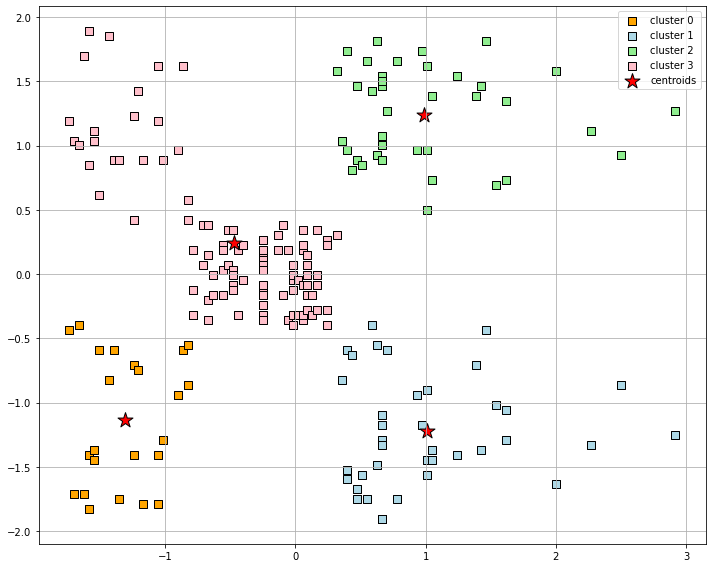

In [6]:
import matplotlib.pyplot as plt

colors = ['orange', 'lightblue', 'lightgreen', 'pink', 'purple', 'yellow']

fig = plt.figure()
fig.set_size_inches(10, 8)

for i in range(km4.n_clusters):
  plt.scatter(X[y_km4 == i, 0],
              X[y_km4 == i, 1],
              s=50, c=colors[i],
              marker='s', edgecolor='black',
              label=f'cluster {i}')


plt.scatter(km4.cluster_centers_[:, 0],
            km4.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

Then, I applied elbow method to determine the number of clusters. Based on the chart below, it looks like 5 clusters are optimal.

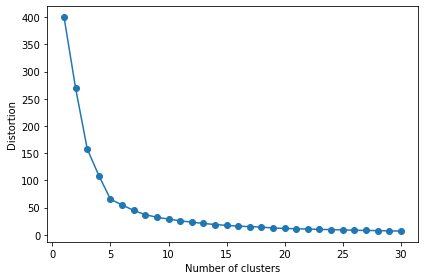

In [8]:
distortions = []
for i in range(1, 31):
    kmi = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    kmi.fit(X)
    distortions.append(kmi.inertia_)
plt.plot(range(1, 31), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

After using the elbow method to determine that 5 clusters is likely the optimal number of clusters, I plotted k-means clustering using 5 clusters.

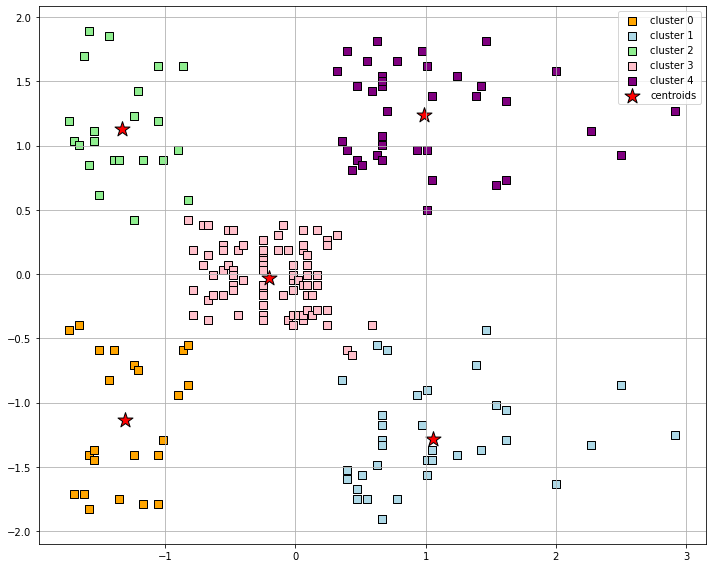

In [9]:
km5 = KMeans(n_clusters=5,
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km5 = km5.fit_predict(X)

colors = ['orange', 'lightblue', 'lightgreen', 'pink', 'purple', 'yellow']

fig = plt.figure()

fig.set_size_inches(10, 8)

for i in range(km5.n_clusters):
  plt.scatter(X[y_km5 == i, 0],
              X[y_km5 == i, 1],
              s=50, c=colors[i],
              marker='s', edgecolor='black',
              label=f'cluster {i}')


plt.scatter(km5.cluster_centers_[:, 0],
            km5.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

**Problem 3: Apply silhouette analysis on the above k-mean clustering.**

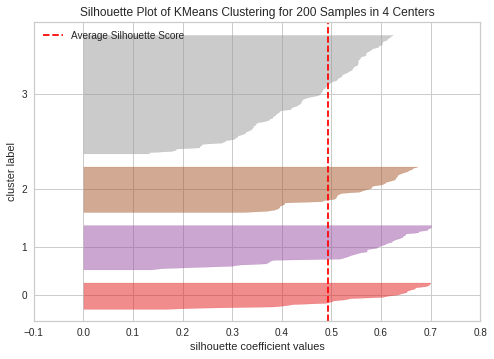

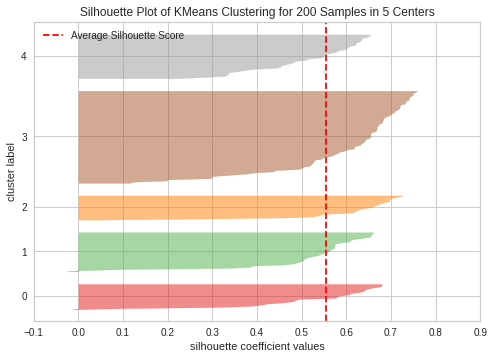

In [13]:
from yellowbrick.cluster import SilhouetteVisualizer

km4.visualizer = SilhouetteVisualizer(km4)
km5.visualizer = SilhouetteVisualizer(km5)

km4.visualizer.fit(X)
km4.visualizer.poof()

km5.visualizer.fit(X)
km5.visualizer.poof()

I used a Silhouette Plot on both the 4-cluster model I started with and the 5-cluster model. From these plots, you can see that the average silhouette coefficient score is higher in the 5-cluster model versus the 4-cluster model. This indicates that 5 clusters is more ideal than 4.